<a href="https://colab.research.google.com/github/Ravikiit/Quantative_Analysis/blob/main/PART7_7_Monte_Carlo_Euler_Discretization_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
r = 0.025


In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [6]:
type(stdev)


pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([0.17610875])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 89.72644653,  87.56373516,  87.57256834, ...,  88.54880992,
         87.01419094,  90.5917223 ],
       [ 89.34539393,  87.12567229,  86.62461114, ...,  88.94170649,
         85.63615501,  88.99044461],
       ...,
       [ 96.8630221 ,  82.92214461, 107.25929872, ..., 100.88304048,
         92.92393889,  83.73544476],
       [ 96.83161981,  83.14919729, 106.72017284, ..., 100.78977315,
         93.36627662,  85.56149674],
       [ 95.65124077,  84.32166849, 106.30169376, ..., 101.04447416,
         92.81851897,  85.53918668]])

In [12]:
S.shape

(251, 10000)

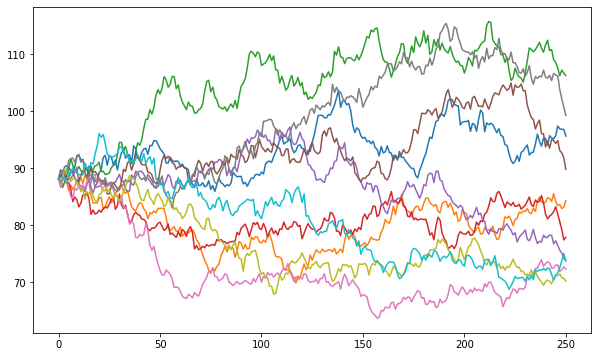

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);